# Analysis of text mining tools

- tools over time
- gender diversity and charge to researchers
- common techniques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


#read file and remove the unnamed first column
text_mining_df = pd.read_csv('text_mining.csv', index_col=0)

## Diversity in leadership teams

In [2]:
#recompute yearly total only for this cluster
text_mining_df.year_founded = pd.to_datetime(text_mining_df.year_founded, infer_datetime_format=True, errors='ignore')
text_mining_df['yearly_total'] = text_mining_df.groupby('year_founded')["name"].transform('count')

#compute yearly total where women in leadership
text_mining_df['women'] = text_mining_df.key_person_gender.str.contains("W")
text_mining_df['women_total'] = text_mining_df.groupby('year_founded')["women"].transform('sum')


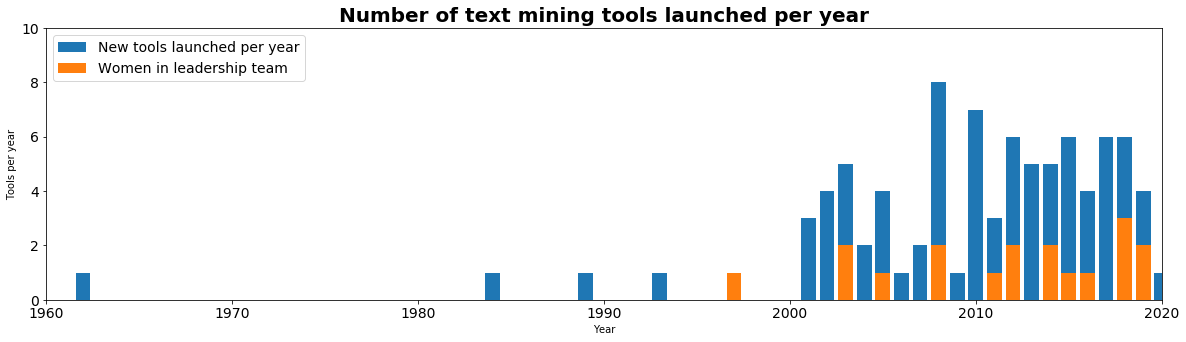

In [26]:
plt.figure(figsize=(20,5))
plt.bar(text_mining_df.year_founded.dt.year, text_mining_df.yearly_total, label='New tools launched per year')
plt.axis([1960, 2020, 0, 10])

plt.title('Number of text mining tools launched per year', fontdict={'fontweight':'bold', 'fontsize': 20})
plt.xlabel('Year')
plt.ylabel('Tools per year')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.bar(text_mining_df.year_founded.dt.year, text_mining_df.women_total, label='Women in leadership team')

plt.legend(loc='upper left', fontsize=14)

plt.savefig('images/text_mining_per_year_and_diversity.png')
plt.show()

## Charges to researchers

In [16]:
#using pivot table
pivot = text_mining_df.pivot_table(values='name', index='year_founded', columns='charges_academic', aggfunc='count', fill_value=0)

#get running totals
pivot_totals = pivot.cumsum(axis=0)
pivot_totals['all'] = pivot_totals.sum(axis=1)
#pivot_totals.plot()

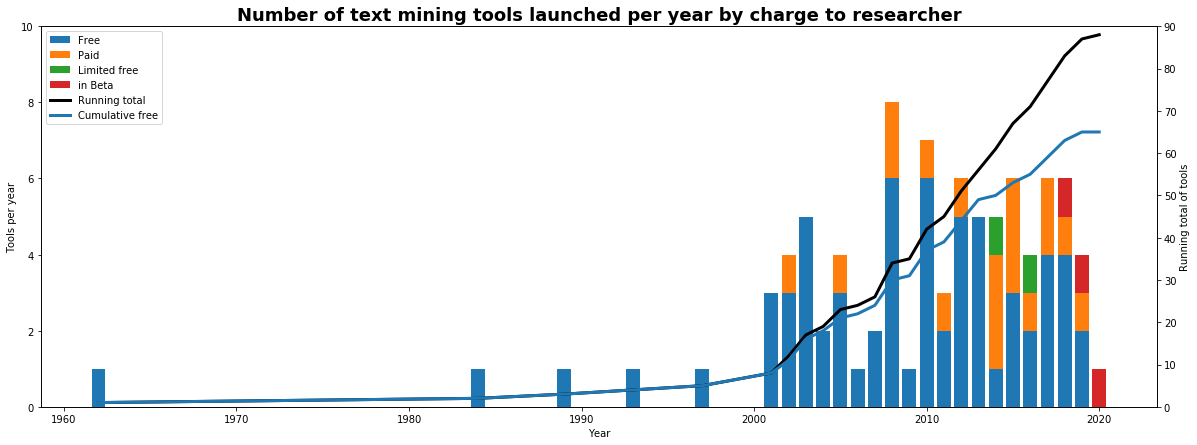

In [22]:
#plotting with matplotlib in order to keep the years to scale rather than keep year_founded as categorical

fig, ax1 = plt.subplots(figsize=(20, 7))

ax1.bar(pivot.index.year, pivot['Free'], label='Free')
ax1.bar(pivot.index.year, pivot['Paid'], bottom=pivot['Free'], label='Paid')
ax1.bar(pivot.index.year, pivot['Limited free'], bottom=[x+y for x,y in zip(pivot['Free'],pivot['Paid'])], label='Limited free')
ax1.bar(pivot.index.year, pivot['in beta'], bottom=[x+y+z for x,y,z in zip(pivot['Free'],pivot['Paid'],pivot['Limited free'])], label='in Beta')

ax2 = ax1.twinx()

ax2.plot(pivot_totals.index.year, pivot_totals['all'], label='Running total', linewidth=3.0, c='k')
ax2.plot(pivot_totals.index.year, pivot_totals['Free'], label='Cumulative free', linewidth=3.0)

ax1.set_xlabel('Year')
ax1.set_ylabel('Tools per year')
ax2.set_ylabel('Running total of tools')

ax1.set_ylim(0,10)
ax2.set_ylim(0,90)


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)

plt.title('Number of text mining tools launched per year by charge to researcher', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.savefig('images/text_mining_per_year_and_charge.png', dpi=300)

plt.show()



## Most common text mining techniques

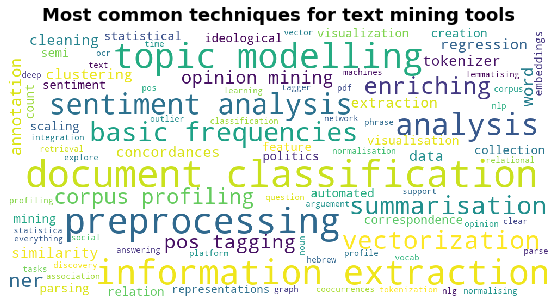

In [28]:
text_mining_df['technique'] = text_mining_df['technique'].str.lower()

wordcloud = WordCloud(
    width = 1000, 
    height = 500, 
    background_color = 'white').generate(', '.join(text_mining_df['technique']))

fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'w',
    edgecolor = 'k')

plt.title('Most common techniques for text mining tools', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.imshow(wordcloud)
plt.axis("off")

plt.savefig('images/text_mining_techniques.png', dpi=300)
plt.show()